# Data Storytelling on Titanic 

![](https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/master/Module%2003%20-%20Data%20Visualization%20and%20Storytelling/titanic_banner.gif)

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. Let's try and visualize some interesting patterns in this dataset



# Load Dependencies

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Load Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/master/Module%2003%20-%20Data%20Visualization%20_Storytelling/titanic.csv")
df.shape

(891, 12)

### Sample records

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dataset Details

![](https://i.imgur.com/bee8xRl.png)

### Basic Stats

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin seems to have lots of missing data, as do attributes like Age and Embarked.

## Story Begins...

### Visualising missing values using heatmaps

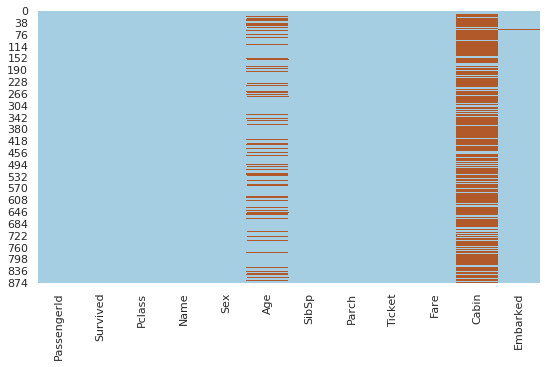

In [5]:
# set plotting canvas to 9x5 dimensions
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False,cmap=sns.color_palette("Paired"));

### Who Survived?

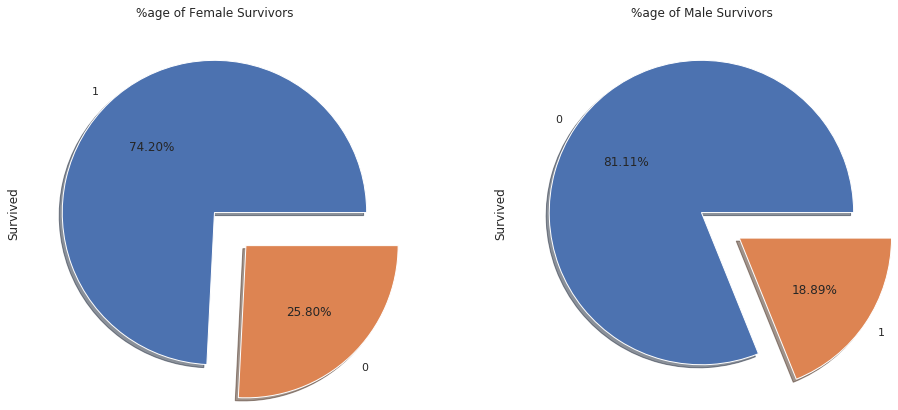

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

df['Survived'][df['Sex'] == 'female'].value_counts().plot.pie(
    explode=[0, 0.3], autopct='%1.2f%%', ax=ax[0], shadow=True)

df['Survived'][df['Sex'] == 'male'].value_counts().plot.pie(
    explode=[0, 0.3], autopct='%1.2f%%', ax=ax[1], shadow=True)

ax[0].set_title('%age of Female Survivors')
ax[1].set_title('%age of Male Survivors');

_* Humans are bad at reading angles. Use Pie Charts carefully.
See more here: https://www.geckoboard.com/blog/pie-charts/_

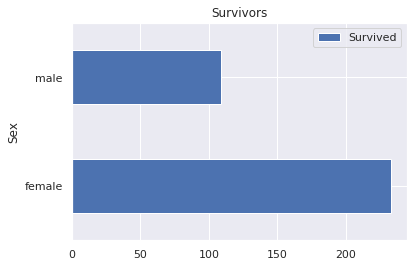

In [7]:
df.groupby('Sex').agg({'Survived':'sum'}).plot(kind='barh')
plt.title('Survivors');

Women were more likely to survive than men

### Does Money make you Safer?

In [8]:
pd.crosstab(
    df.Pclass, df.Survived,
    margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [9]:
print("% of survivals in")
print("Pclass=1 : {}%".format(
    round(
        df.Survived[df.Pclass == 1].sum() /
        df[df.Pclass == 1].Survived.count(), 5) * 100))
print("Pclass=2 : {}%".format(
    round(
        df.Survived[df.Pclass == 2].sum() /
        df[df.Pclass == 2].Survived.count(), 5) * 100))
print("Pclass=3 : {}%".format(
    round(
        df.Survived[df.Pclass == 3].sum() /
        df[df.Pclass == 3].Survived.count(), 5) * 100))

% of survivals in
Pclass=1 : 62.963%
Pclass=2 : 47.282999999999994%
Pclass=3 : 24.236%


### Did Point of Embarkation have any impact?

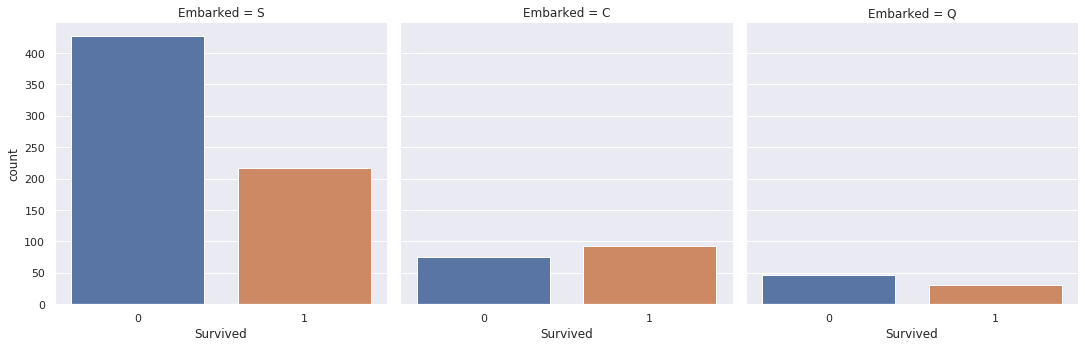

In [10]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df);

### Cross Tab of Class, Gender and Embarkation point with Survival

In [11]:
pd.crosstab(
    index=[df.Survived],
    columns=[df.Sex, df.Pclass, df.Embarked],
    margins=True).style.background_gradient(cmap='summer_r')

__Insights__
+ Almost all women from Pclass 2 who embarked at C and Q survived
+ Nearly all women of Pclass 1 survived.
+ All men of Pclass 1 and 2 who embarked at Q died!

### Age Distribution

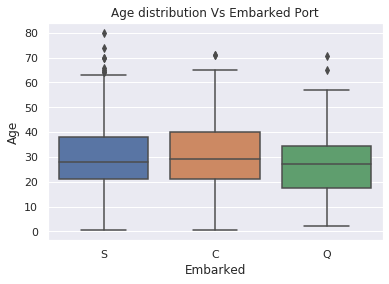

In [12]:
sns.boxplot(x='Embarked', y='Age', data=df)
plt.title("Age distribution Vs Embarked Port");

### Advanced Plots: Swarm/Violin Plots

In [0]:
cm_surv = ["grey" , "green"]

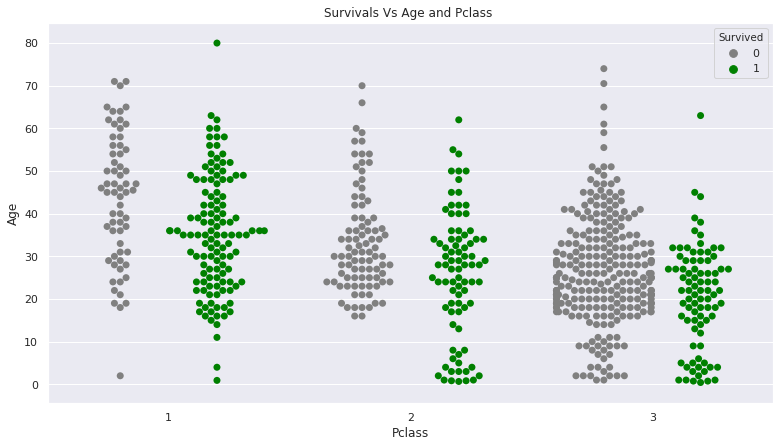

In [14]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=df , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals Vs Age and Pclass ');

Kids in Class 3 had a really bad time!

### How were the Tickets Priced?

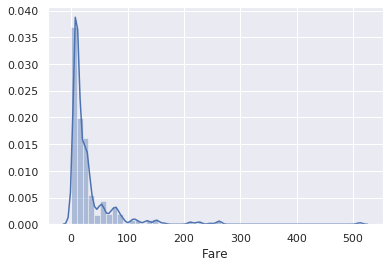

In [15]:
sns.distplot(df['Fare']);

### Correlation between attributes

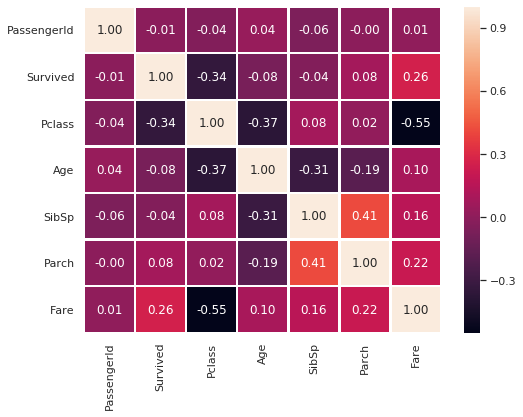

In [17]:
corr = df.corr()

f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, linewidths=1.5 , fmt='.2f',ax=ax);

# This has to be done for a bug in seaborn\matplotlib which should get fixed with matplotlib 3.1.2
b, t = ax.get_ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
ax.set_ylim(b, t); # update the ylim(bottom, top) values

We see a lot of negative correlations.
With most columns being categorical, we need to perform some transformations

In [0]:
# add bins for fare and age
df_ml = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df_ml.dropna(inplace=True)

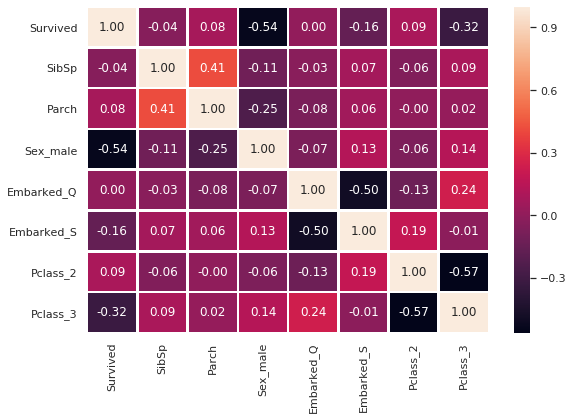

In [19]:
corr = df_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

# This has to be done for a bug in seaborn\matplotlib which should get fixed with matplotlib 3.1.2
b, t = ax.get_ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
ax.set_ylim(b, t); # update the ylim(bottom, top) values